In [1]:
num_eps = [6,22,24,14,26,26,24,24,23]
episodes = []
epnames = []
for season in range(1,10):
    for ep in range(1,num_eps[season-1]+1):
        if ep < 10:
            ep_str = "s0" + str(season) + "e0" + str(ep)
        else:
            ep_str = "s0" + str(season) + "e" + str(ep)
        if (not (ep == 11 and season == 3) and not (season == 6 and (ep == 5 or ep == 18))):
            with open(ep_str, "r") as file:
                episodes.append(file.readline())
                epnames.append(ep_str)
        

In [2]:
with open("allep", "w+") as file:
    for episode in episodes:
        file.write(episode)
        file.write("\n")

In [3]:
import spacy

In [4]:
sp = spacy.load('en_core_web_sm')

In [5]:
sentence2 = sp("Manchester United isn't looking to sign any forward. Bla.")

In [6]:
for word in sentence2:  
    print(word.text)

Manchester
United
is
n't
looking
to
sign
any
forward
.
Bla
.


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from html import unescape

In [51]:
class MyAnalyzer(object):
    
    # load spaCy's english model and define the tokenizer/lemmatizer
    def __init__(self):
        spacy.load('en')
        self.lemmatizer_ = spacy.lang.en.English()
        
    # allow the class instance to be called just like
    # just like a function and applies the preprocessing and
    # tokenize the document
    def __call__(self, doc):
        doc_clean = unescape(doc).lower().replace("-"," ")
        #tokens = sp(doc_clean)
        #return([token.text for token in tokens])
        tokens = self.lemmatizer_(doc_clean)
        return([token.lemma_ for token in tokens])

    
#vectorizer = CustomVectorizer(stop_words = 'english')
analyzer = MyAnalyzer()
vectorizer = CountVectorizer(analyzer=analyzer, stop_words='english')

In [52]:
#vectorizer = CountVectorizer()
X = vectorizer.fit_transform(episodes)

In [53]:
df = pd.DataFrame(X.toarray())

In [54]:
vectorizer

CountVectorizer(analyzer=<__main__.MyAnalyzer object at 0x1a32609cf8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words='english', strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [55]:
for i in vectorizer.get_feature_names():
    if '-' in i:
        print(i)

-PRON-
spin-dry


In [56]:
df.shape

(186, 15114)

In [57]:
df = df.div(df.sum(axis=1), axis=0)

In [58]:
df.to_csv("bow.tsv", sep='\t', header=vectorizer.get_feature_names(), index=False)

In [59]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(df)
X_transformed.shape

(186, 2)

In [60]:
dft = pd.DataFrame(X_transformed)
dft.head()

,0,1
0,0.004657,-0.028321
1,-0.000811,-0.018751
2,0.017672,-0.030398
3,0.027855,-0.015288
4,0.037573,0.001573


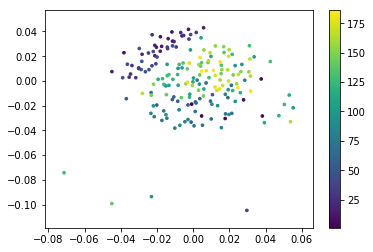

In [61]:
from matplotlib import pyplot as plt
f1 = dft[0].values
f2 = dft[1].values
c = list(range(1,187))
plt.scatter(f1, f2, c=c, s=7)
plt.colorbar()

In [62]:
from scipy.spatial.distance import pdist, squareform

distances = pdist(dft.values, metric='euclidean')
dist_matrix = squareform(distances)


In [63]:
dMatrix = pd.DataFrame(dist_matrix)

In [64]:
dMatrix.head()

,0,1,2,3,4,5,6,7,8,9,...,176,177,178,179,180,181,182,183,184,185
0,0.000000,0.011022,0.013179,0.026609,0.044466,0.033557,0.066740,0.067968,0.062576,0.070383,...,0.028320,0.036625,0.024068,0.024534,0.033692,0.047226,0.044930,0.036226,0.030407,0.037438
1,0.011022,0.000000,0.021846,0.028875,0.043433,0.040190,0.055930,0.057152,0.052000,0.060464,...,0.017814,0.028139,0.019776,0.018869,0.034196,0.037934,0.037620,0.027211,0.028775,0.029814
2,0.013179,0.021846,0.000000,0.018222,0.037660,0.020643,0.077185,0.075184,0.068983,0.074879,...,0.035929,0.039998,0.024158,0.026096,0.026211,0.051200,0.045900,0.040452,0.025905,0.039479
3,0.026609,0.028875,0.018222,0.000000,0.019461,0.016678,0.076300,0.068673,0.061582,0.064601,...,0.034062,0.031267,0.015897,0.018923,0.008010,0.041779,0.033318,0.032801,0.010309,0.029085
4,0.044466,0.043433,0.037660,0.019461,0.000000,0.029939,0.078752,0.065336,0.057742,0.056767,...,0.040765,0.031060,0.024274,0.026361,0.011453,0.037924,0.026545,0.033517,0.014660,0.027296


In [65]:
dft.index[dft[1] < -0.05].tolist()

[40, 99, 128, 138]

In [66]:
epnames[128]

's07e14'

In [67]:
pd.DataFrame.idxmax(dft,axis=0)

0    102
1     15
dtype: int64

In [68]:
dMatrix.to_csv("dist.tsv", sep=',', header=epnames, index=False)

In [ ]:
from skbio.stats.distance import DissimilarityMatrix
dm = DissimilarityMatrix()